In [0]:
import os
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
dataset=np.load("/content/drive/My Drive/Song Genre/dataset.npz")

In [4]:
dataset['arr_0'].shape

(6000, 128, 128)

In [0]:
X=dataset['arr_0']
y=dataset['arr_1']

In [0]:
X=X.reshape(6000,128,128,1)
X=X/255.0

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=38)

In [0]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=60)

In [9]:
print(X_test.shape, y_test.shape)

(600, 128, 128, 1) (600, 10)


In [10]:
print(X_val.shape,y_val.shape)

(1080, 128, 128, 1) (1080, 10)


In [11]:
print(X_train.shape,y_train.shape)

(4320, 128, 128, 1) (4320, 10)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout,InputLayer,AveragePooling2D,Activation,LeakyReLU
from tensorflow.keras import optimizers

In [0]:
model=Sequential()

model.add(Conv2D(16,kernel_size=3,kernel_initializer='glorot_uniform',padding='same',input_shape=(128,128,1)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=2,strides=2))

model.add(Conv2D(32,kernel_size=3,kernel_initializer='glorot_uniform',padding='same'))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=2,strides=2))

model.add(Conv2D(64,kernel_size=3,kernel_initializer='glorot_uniform',padding='same'))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=2,strides=2))

model.add(Conv2D(128,kernel_size=3,kernel_initializer='glorot_uniform',padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(256,kernel_size=3,kernel_initializer='glorot_uniform',padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Flatten())

model.add(Dense(128,kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))

model.add(Dense(32,kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
stats=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=64)

Train on 4320 samples, validate on 1080 samples
Epoch 1/100
4320/4320 [==============================] - 3s 680us/sample - loss: 2.3045 - acc: 0.0912 - val_loss: 2.3016 - val_acc: 0.0963
Epoch 2/100
4320/4320 [==============================] - 2s 406us/sample - loss: 2.2019 - acc: 0.1627 - val_loss: 2.1005 - val_acc: 0.2565
Epoch 3/100
4320/4320 [==============================] - 2s 405us/sample - loss: 1.9821 - acc: 0.2792 - val_loss: 1.7826 - val_acc: 0.3324
Epoch 4/100
4320/4320 [==============================] - 2s 409us/sample - loss: 1.8448 - acc: 0.3259 - val_loss: 1.7106 - val_acc: 0.3769
Epoch 5/100
4320/4320 [==============================] - 2s 409us/sample - loss: 1.7266 - acc: 0.3632 - val_loss: 1.6081 - val_acc: 0.3963
Epoch 6/100
4320/4320 [==============================] - 2s 412us/sample - loss: 1.6283 - acc: 0.3896 - val_loss: 1.5085 - val_acc: 0.4352
Epoch 7/100
4320/4320 [==============================] - 2s 416us/sample - loss: 1.5558 - acc: 0.4169 - val_loss: 1.42

In [141]:
model.evaluate(X_test,y_test)

600/600 [==============================] - 0s 261us/sample - loss: 1.6864 - acc: 0.7767


[1.6863536914189656, 0.77666664]

In [0]:
import matplotlib.pyplot as plt

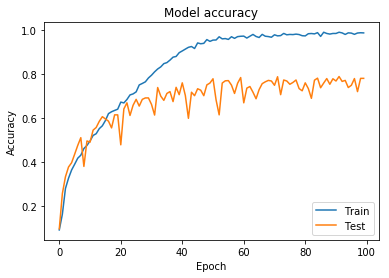

In [143]:
plt.plot(stats.history["acc"])
plt.plot(stats.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

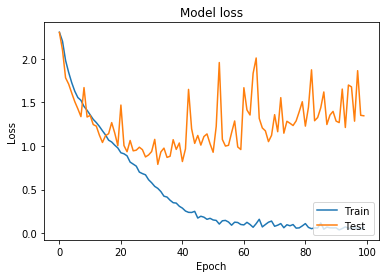

In [144]:
plt.plot(stats.history['loss'])
plt.plot(stats.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

In [145]:
max(stats.history['val_acc'])

0.787963

In [0]:
model.save("model.h5")

In [0]:
from google.colab import files
files.download('model.h5') 